## Import necessary libraries

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB,MultinomialNB


## Import Dataset

In [92]:
Salary_Test = pd.read_csv("SalaryData_Test(1).csv")
Salary_Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [93]:
Salary_Train = pd.read_csv("SalaryData_Train(1).csv")
Salary_Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [94]:
Salary_Test.shape,Salary_Train.shape

((15060, 14), (30161, 14))

In [95]:
Salary = pd.concat([Salary_Test,Salary_Train])
Salary

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Data understanding

In [96]:
Salary.shape

(45221, 14)

In [97]:
Salary.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [98]:
Salary.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [99]:
Salary.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


## Data preparation

In [100]:
del Salary['educationno']

In [102]:
Salary.shape

(45221, 13)

In [103]:
Salary

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [105]:
le = LabelEncoder()
Salary['workclass'] = le.fit_transform(Salary.workclass)
Salary['education'] = le.fit_transform(Salary.education)
Salary['maritalstatus'] = le.fit_transform(Salary.maritalstatus)
Salary['relationship'] = le.fit_transform(Salary.relationship)
Salary['sex'] = le.fit_transform(Salary.sex)
Salary['race'] = le.fit_transform(Salary.race)
Salary['native'] = le.fit_transform(Salary.native)
Salary['Salary'] = le.fit_transform(Salary.Salary)
Salary['occupation'] = le.fit_transform(Salary.occupation)

In [106]:
Salary

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,4,6,3,2,1,0,0,40,37,0
1,38,2,11,2,4,0,4,1,0,0,50,37,0
2,28,1,7,2,10,0,4,1,0,0,40,37,1
3,44,2,15,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,4,0,3,4,1,0,0,20,37,0


In [107]:
Salary.dtypes,Salary.shape

(age              int64
 workclass        int64
 education        int64
 maritalstatus    int64
 occupation       int32
 relationship     int64
 race             int64
 sex              int64
 capitalgain      int64
 capitalloss      int64
 hoursperweek     int64
 native           int64
 Salary           int64
 dtype: object,
 (45221, 13))

## Model building

In [110]:
X = Salary.drop('Salary',axis=1)
y = Salary['Salary']

In [111]:
X

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,4,6,3,2,1,0,0,40,37
1,38,2,11,2,4,0,4,1,0,0,50,37
2,28,1,7,2,10,0,4,1,0,0,40,37
3,44,2,15,2,6,0,2,1,7688,0,40,37
4,34,2,0,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,2,12,5,4,0,0,0,38,37
30157,40,2,11,2,6,0,4,1,0,0,40,37
30158,58,2,11,6,0,4,4,0,0,0,40,37
30159,22,2,11,4,0,3,4,1,0,0,20,37


In [112]:
y

0        0
1        0
2        1
3        1
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 45221, dtype: int64

In [113]:
X.shape,y.shape

((45221, 12), (45221,))

In [115]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=15,stratify = y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((36176, 12), (9045, 12), (36176,), (9045,))

## Model Training | Model Testing | Model Evaluation

In [117]:
Gmodel = GaussianNB()
Gmodel.fit(X_train,y_train)
y_pred = Gmodel.predict(X_test)

In [118]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [119]:
y_test

2416     0
23470    0
7982     0
15816    1
6392     0
        ..
14334    0
1027     1
5250     0
1016     0
22248    1
Name: Salary, Length: 9045, dtype: int64

Overall Accuracy    :  0.7904
Precision           :  1.0
Recall              :  1.0
AUC Score           :  1.0
Confusion Matrix    :
 [[6803    0]
 [   0 2242]]
Confusion Matrix    :


Text(0.5, 1.0, 'Prediction Vs Actual')

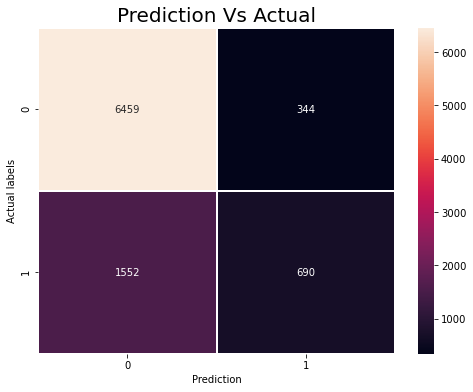

In [122]:
print("Overall Accuracy    : ",round(accuracy_score(y_test,y_pred),4))
print("Precision           : ",round(precision_score(y_test,y_test),4))
print("Recall              : ",round(recall_score(y_test,y_test),4))
print("AUC Score           : ",round(roc_auc_score(y_test,y_test),4))
print('Confusion Matrix    :\n',confusion_matrix(y_test,y_test))
print("Confusion Matrix    :")

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(data = confu_matrix,
            annot=True,
            linewidths=0.8,
            fmt='g'
           )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)

Overall Accuracy    :  0.7751
Precision           :  1.0
Recall              :  1.0
AUC Score           :  1.0
Confusion Matrix    :
 [[6803    0]
 [   0 2242]]
Confusion Matrix    :


Text(0.5, 1.0, 'Prediction Vs Actual')

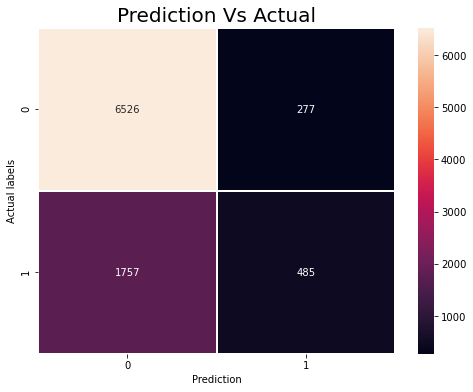

In [123]:
Mmodel = MultinomialNB()
Mmodel.fit(X_train,y_train)
y_pred = Mmodel.predict(X_test)

print("Overall Accuracy    : ",round(accuracy_score(y_test,y_pred),4))
print("Precision           : ",round(precision_score(y_test,y_test),4))
print("Recall              : ",round(recall_score(y_test,y_test),4))
print("AUC Score           : ",round(roc_auc_score(y_test,y_test),4))
print('Confusion Matrix    :\n',confusion_matrix(y_test,y_test))
print("Confusion Matrix    :")

plt.figure(figsize = (8,6))
confu_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(data = confu_matrix,
            annot=True,
            linewidths=0.8,
            fmt='g'
           )
plt.xlabel("Prediction")
plt.ylabel("Actual labels")
plt.title("Prediction Vs Actual",size = 20)

# --------------------------------------------------------------------------------------------